In [127]:
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
import h5py
plt.style.use('./graph_preset.mplstyle')

### １．データの読み込み

In [345]:
run_dir = Path("../runs")
read_paths = natsorted(run_dir.glob("*.h5"))

for idx, read_path in enumerate(read_paths, start=0):
    run_name = Path(read_path).name   # e.g. 250526105004.h5
    print(f"{idx}: {run_name}")

0: 251015133858.h5
1: 251015145214.h5
2: 251015145355.h5
3: 251015145440.h5
4: 251015145511.h5
5: 251015145638.h5
6: 251015145824.h5
7: 251015155457.h5
8: 251015160924.h5
9: 251015170304.h5
10: 251015174245.h5
11: 251015183849.h5
12: 251015192850.h5
13: 251016145452.h5
14: 251016155900.h5
15: 251016184951.h5
16: 251016210453.h5
17: 251017120100.h5
18: 251017144240.h5
19: 251017144427.h5
20: 251017151159.h5
21: 251020134431.h5
22: 251020152210.h5
23: 251020174711.h5
24: 251020181405.h5
25: 251020193355.h5
26: 251021120406.h5
27: 251021132757.h5
28: 251021145710.h5
29: 251021163834.h5
30: 251021182112.h5
31: 251022132531.h5
32: 251022150043.h5
33: 251022163749.h5
34: 251022181328.h5
35: 251022195450.h5
36: 251024100335.h5
37: 251024135625.h5
38: 251025095812.h5
39: 251025141900.h5
40: 251027133518.h5
41: 251027163044.h5
42: 251027174107.h5
43: 251027174230.h5
44: 251028091902.h5
45: 251028093358.h5
46: 251028111923.h5
47: 251028130425.h5
48: 251028144536.h5
49: 251028144718.h5
50: 251028

### ２．データの選択

In [346]:
index = 73

with h5py.File(read_paths[index], "r") as f: # read_paths[#] that you want to read
    print(f"--- Structure of {read_path} ---")

    def print_structure(name, obj):
        # データセットの場合は形状とデータ型も表示
        if isinstance(obj, h5py.Dataset):
            print(f"  {name} (Dataset) | Shape: {obj.shape}, Dtype: {obj.dtype}")
        # グループの場合はグループ名を表示
        elif isinstance(obj, h5py.Group):
            print(f"  {name} (Group)")

    f.visititems(print_structure)
    print("---------------------------------")

--- Structure of ..\runs\251031173046.h5 ---
  current_reduction (Group)
  logs (Group)
  logs/log (Dataset) | Shape: (14087, 4), Dtype: float32
---------------------------------


In [347]:
df_data = dict()

def store_dataset(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"  Loading: {name} | Shape: {obj.shape}")
        df = pd.DataFrame(obj[:])
        df_data[name] = df

with h5py.File(read_paths[index], "r") as f:
    print(f"--- Loading all datasets from {read_paths[index]} ---")
    f.visititems(store_dataset)
    print("---------------------------------------------")

print("\n--- Dictionary Keys ---")
print(list(df_data.keys()))
print("-----------------------")

--- Loading all datasets from ..\runs\251031173046.h5 ---
  Loading: logs/log | Shape: (14087, 4)
---------------------------------------------

--- Dictionary Keys ---
['logs/log']
-----------------------


In [348]:
if 'logs/log' in df_data:
    df_data['logs/log'].columns = ["rel_time", "com", "vel", "Ptot_sum", "Ptot_w"]

for name in list(df_data.keys())[:-1]:
    if name in df_data:
        df_data[name].columns = ["rel_time", "Iu", "Vu", "Ptot_sum", "Ptot_w"]

In [349]:
df_data["logs/log"]

,rel_time,com,vel,Ptot
0,0.124989,0.000000,0.000000,0.000003
1,0.249989,0.000000,0.000000,0.000003
2,0.374988,0.000000,-0.003906,0.659186
3,0.499988,0.000000,-0.011719,0.732737
4,0.624987,0.000000,-0.023438,0.731978
...,...,...,...,...
14082,1760.367920,0.399983,0.000000,-0.000015
14083,1760.492920,0.399983,0.000000,-0.000011
14084,1760.617920,0.399983,0.000000,-0.000016
14085,1760.742920,0.399983,0.000000,-0.000009


In [350]:
df_data["current_reduction/current_45"]

KeyError: 'current_reduction/current_45'

### ３．プロット

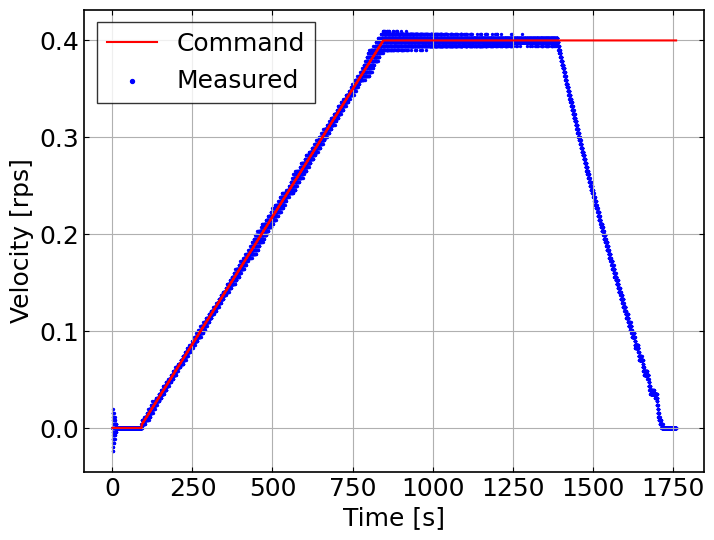

In [351]:
# Rot. Freq (Command, Measured)
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(df_data["logs/log"]["rel_time"], df_data["logs/log"]["com"], label="Command", color="red")
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["vel"], label="Measured", color="blue", s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.grid()
ax.legend()

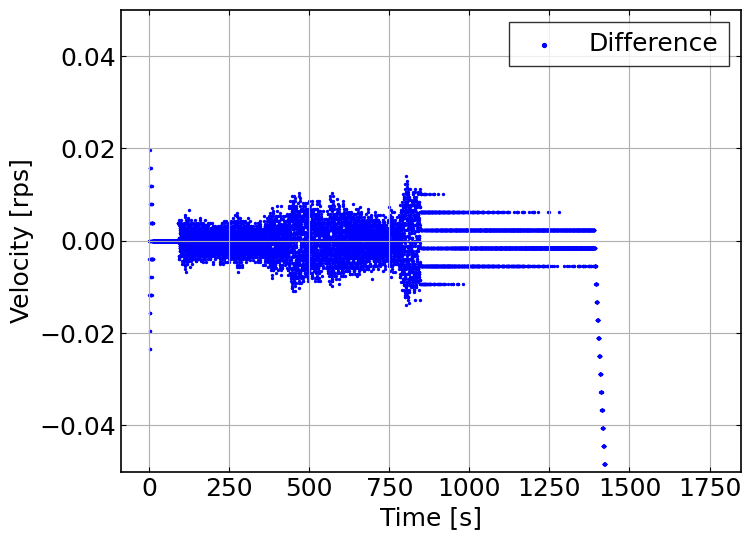

In [352]:
# Diff of Rot Freq (Measured-Command)
fig, ax = plt.subplots(figsize=(8, 6))
#ax.step(df_data["logs/log"]["rel_time"], df_data["logs/log"]["com"], label="Command", color="red")
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["vel"]-df_data["logs/log"]["com"], label="Difference", color="blue", s=2)

ax.set_ylim(-0.05, 0.05)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.grid()
ax.legend()

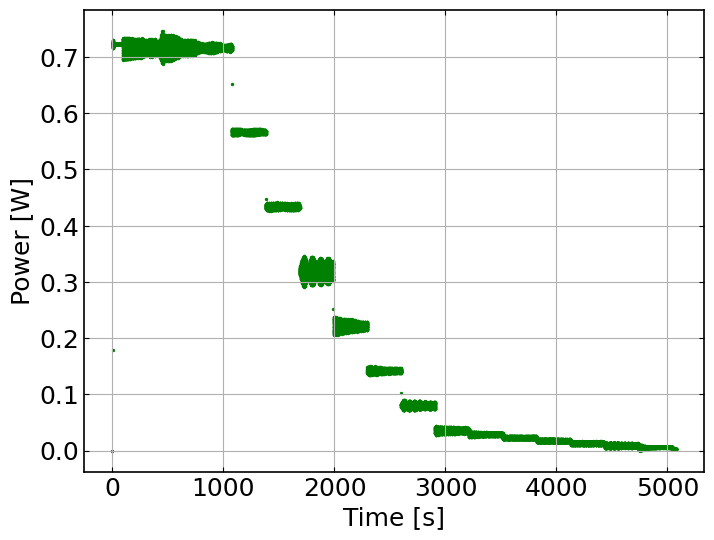

In [283]:
# Power
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["Ptot"], label="Pow.", color="g", s=2)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Power [W]")

ax.grid()
#ax.legend()

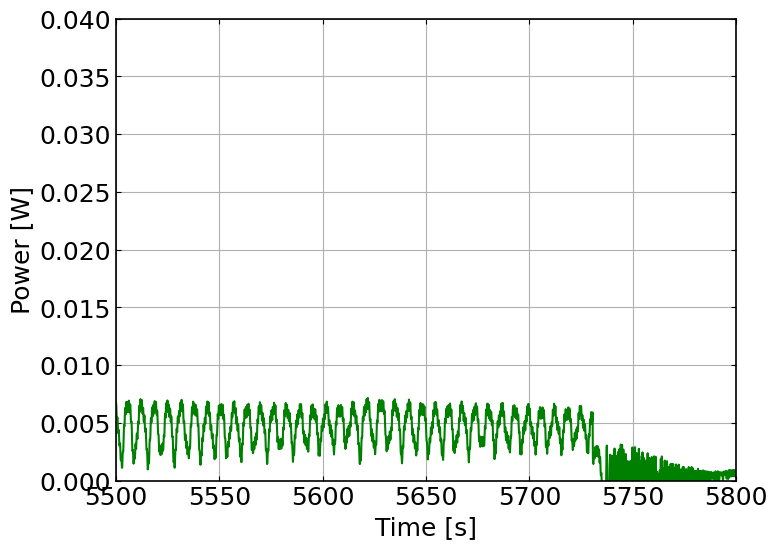

In [271]:
# Power (Expanded)
fig, ax = plt.subplots(figsize=(8, 6))
#ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["Ptot"], label="Pow.", color="g", s=2)
ax.plot(df_data["logs/log"]["rel_time"], df_data["logs/log"]["Ptot"], label="Pow.", color="g", )

ax.set_xlim(5500, 5800)
ax.set_ylim(-0.00, 0.04)
#ax.set_ylim(-0.01, 0.1)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Power [W]")

ax.grid()
#ax.legend()

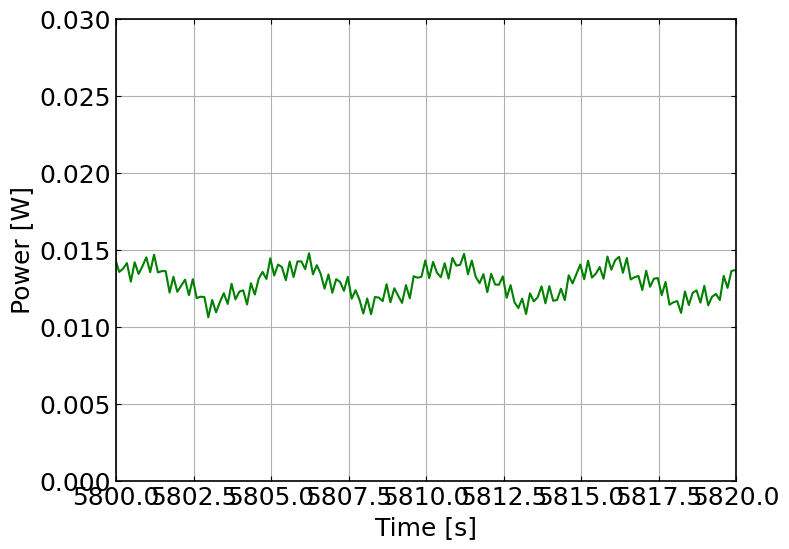

In [246]:
# Power
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_data["logs/log"]["rel_time"], df_data["logs/log"]["Ptot"], label="Pow.", color="g")

ax.set_xlim(5800, 5820)
ax.set_ylim(-0.0, 0.03)
#ax.set_xticks([4550, 4555, 4560, 4565, 4570])
ax.set_xlabel("Time [s]")
ax.set_ylabel("Power [W]")

ax.grid()
#ax.legend()

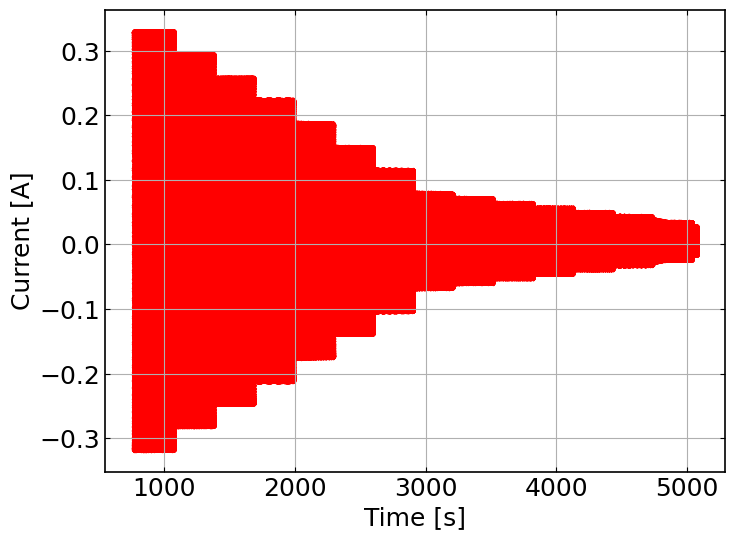

In [284]:
# Current (Whole)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_data["current_reduction/current_45"]["rel_time"][:], df_data["current_reduction/current_45"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_40"]["rel_time"][:], df_data["current_reduction/current_40"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_35"]["rel_time"][:], df_data["current_reduction/current_35"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_25"]["rel_time"][:], df_data["current_reduction/current_25"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_20"]["rel_time"][:], df_data["current_reduction/current_20"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_15"]["rel_time"][:], df_data["current_reduction/current_15"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_10"]["rel_time"][:], df_data["current_reduction/current_10"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_9"]["rel_time"][:], df_data["current_reduction/current_9"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_8"]["rel_time"][:], df_data["current_reduction/current_8"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_7"]["rel_time"][:], df_data["current_reduction/current_7"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_6"]["rel_time"][:], df_data["current_reduction/current_6"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_5"]["rel_time"][:], df_data["current_reduction/current_5"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_4"]["rel_time"][:], df_data["current_reduction/current_4"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_3"]["rel_time"][:], df_data["current_reduction/current_3"]["Iu"][:], label="Current (Iu)", color="red",s=2)
#ax.scatter(df_data["current_reduction/current_2"]["rel_time"][:], df_data["current_reduction/current_2"]["Iu"][:], label="Current (Iu)", color="red",s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")

ax.grid()
#ax.legend()

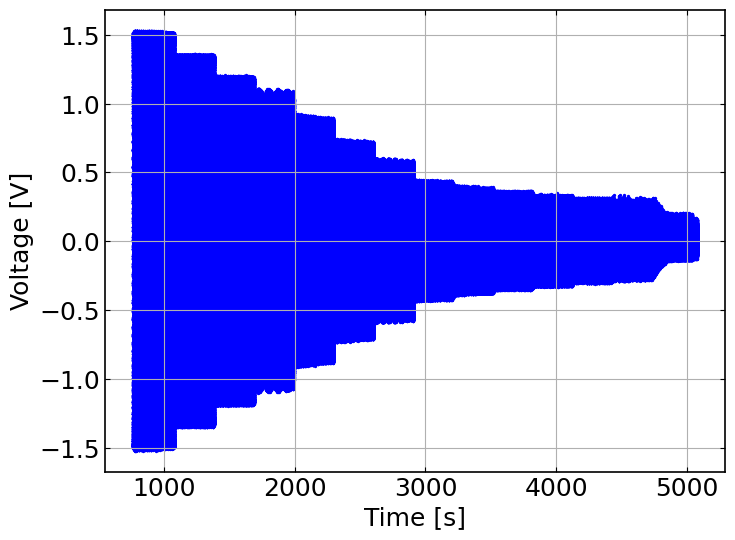

In [285]:
# Voltage (Whole)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_data["current_reduction/current_45"]["rel_time"][:], df_data["current_reduction/current_45"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_40"]["rel_time"][:], df_data["current_reduction/current_40"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_35"]["rel_time"][:], df_data["current_reduction/current_35"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_25"]["rel_time"][:], df_data["current_reduction/current_25"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_20"]["rel_time"][:], df_data["current_reduction/current_20"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_15"]["rel_time"][:], df_data["current_reduction/current_15"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_10"]["rel_time"][:], df_data["current_reduction/current_10"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_9"]["rel_time"][:], df_data["current_reduction/current_9"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_8"]["rel_time"][:], df_data["current_reduction/current_8"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_7"]["rel_time"][:], df_data["current_reduction/current_7"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_6"]["rel_time"][:], df_data["current_reduction/current_6"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_5"]["rel_time"][:], df_data["current_reduction/current_5"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_4"]["rel_time"][:], df_data["current_reduction/current_4"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_3"]["rel_time"][:], df_data["current_reduction/current_3"]["Vu"][:], label="Current (Iu)", color="b",s=2)
#ax.scatter(df_data["current_reduction/current_2"]["rel_time"][:], df_data["current_reduction/current_2"]["Vu"][:], label="Current (Iu)", color="b",s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")

ax.grid()
#ax.legend()

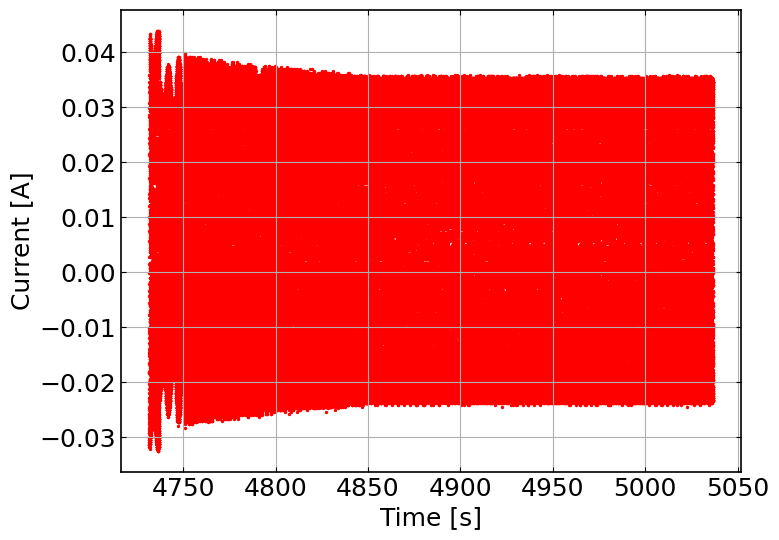

In [286]:
# Current (Expanded)
fig, ax = plt.subplots(figsize=(8, 6))
#ax.scatter(df_data["current_reduction/current_9"]["rel_time"][:], df_data["current_reduction/current_9"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_4"]["rel_time"][:], df_data["current_reduction/current_4"]["Iu"][:], label="Current (Iu)", color="red",s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")

ax.grid()
#ax.legend()

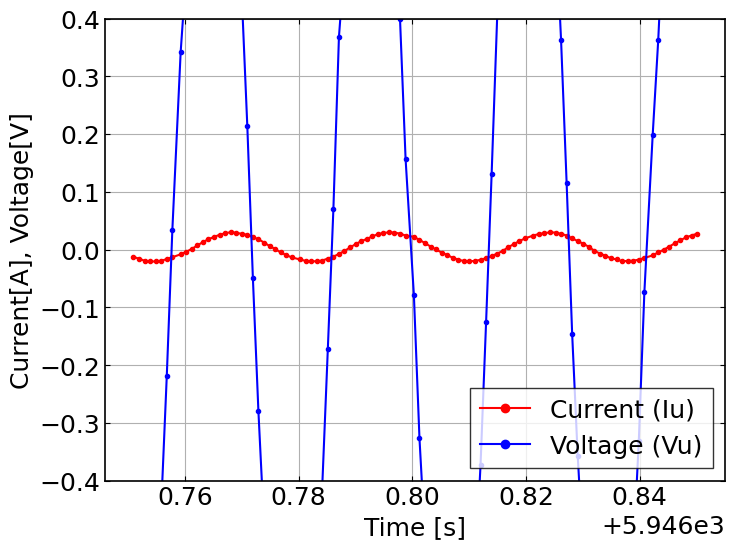

In [232]:
# Current & Voltage (Expanded)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_data["current_reduction/current_6"]["rel_time"][-100:], df_data["current_reduction/current_6"]["Iu"][-100:], marker='.', label="Current (Iu)", color="red",)
ax.plot(df_data["current_reduction/current_6"]["rel_time"][-100:], df_data["current_reduction/current_6"]["Vu"][-100:], marker='.', label="Voltage (Vu)", color="blue",)

ax.set_ylim(-0.4, 0.4)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current[A], Voltage[V]")
ax.set_yticks([-0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4])

ax.grid()
ax.legend(loc='lower right')

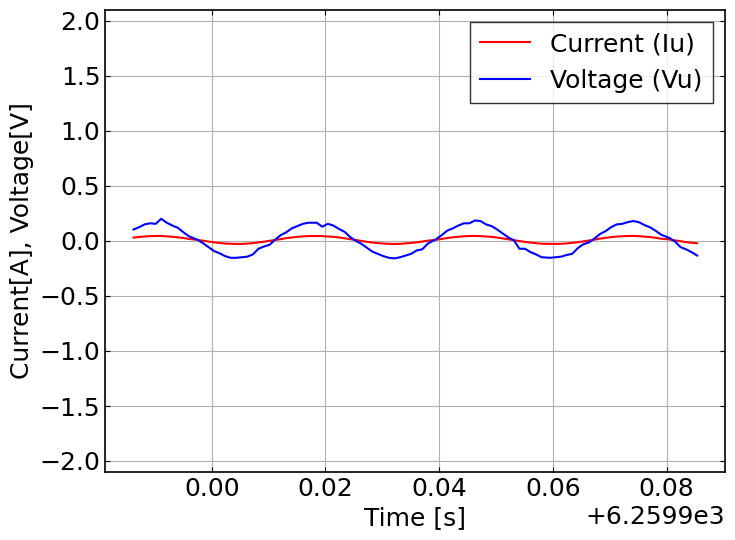

In [143]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_data["current_reduction/current_4"]["rel_time"][:100], df_data["current_reduction/current_4"]["Iu"][:100], label="Current (Iu)", color="red",)
ax.plot(df_data["current_reduction/current_4"]["rel_time"][:100], df_data["current_reduction/current_4"]["Vu"][:100], label="Voltage (Vu)", color="blue",)
#ax.plot(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Iu"][:], label="Current (Iu)", color="red",)
#ax.plot(df_data["current_reduction/current_20"]["rel_time"][:1000], df_data["current_reduction/current_20"]["Vu"][:1000], label="Voltage (Vu)", color="blue",)

ax.set_ylim(-2.1, 2.1)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current[A], Voltage[V]")

ax.grid()
ax.legend()

In [144]:
df_data["current_reduction/current_9"]

,rel_time,Iu,Vu,Ptot
0,4734.383301,0.024383,-0.599030,0.041269
1,4734.384277,0.009714,-0.681340,0.041269
2,4734.385254,-0.005274,-0.763650,0.041269
3,4734.386719,-0.019944,-0.809950,0.041269
4,4734.387695,-0.031743,-0.856249,0.041269
...,...,...,...,...
305120,5039.503906,0.059462,0.301240,0.037103
305121,5039.504883,0.055954,0.038876,0.037103
305122,5039.505859,0.049258,-0.192622,0.037103
305123,5039.506836,0.040647,-0.388109,0.037103


In [145]:
# mkdir
parent_dir = read_paths[index].parent
dir_name = read_paths[index].stem
output_dir = parent_dir / dir_name
output_dir.mkdir(parents=True, exist_ok=True)

In [146]:
# hdf2csv
for name, df in df_data.items():
    base_filename = name.split('/')[-1]
    csv_path = output_dir / (base_filename + ".csv")
    df.to_csv(csv_path, index=False)
    print(f"Data saved to {csv_path}")

Data saved to ..\runs\251029085423\current_1.csv
Data saved to ..\runs\251029085423\current_10.csv
Data saved to ..\runs\251029085423\current_15.csv
Data saved to ..\runs\251029085423\current_2.csv
Data saved to ..\runs\251029085423\current_20.csv
Data saved to ..\runs\251029085423\current_25.csv
Data saved to ..\runs\251029085423\current_3.csv
Data saved to ..\runs\251029085423\current_30.csv
Data saved to ..\runs\251029085423\current_35.csv
Data saved to ..\runs\251029085423\current_4.csv
Data saved to ..\runs\251029085423\current_40.csv


KeyboardInterrupt: 